In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
import yfinance as yf

In [2]:
start = '2014-01-01'
end = '2022-12-22'
stock = 'GOOG'
data = yf.download(stock,start,end)

C:\Users\Abhi tiwari\AppData\Local\Temp\ipykernel_11240\3924065291.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df = data[['Close']].copy()

# Train/test split
train_size = int(len(df) * 0.8)
train_data = df[:train_size].values
test_data  = df[train_size:].values

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train_data)
scaled_test  = scaler.transform(test_data)

In [5]:
# Create sequences
def create_sequences(dataset, time_step=100):
    x, y = [], []
    for i in range(time_step, len(dataset)):
        x.append(dataset[i-time_step:i, 0])  
        y.append(dataset[i, 0])             
    return np.array(x), np.array(y)

time_step = 100
x_train, y_train = create_sequences(scaled_train, time_step)
x_test, y_test   = create_sequences(scaled_test, time_step)

# Reshape to 3D (samples, timesteps, features)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test  = x_test.reshape((x_test.shape[0],  x_test.shape[1],  1))


In [6]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

c:\Users\Abhi tiwari\Documents\project\Stock_prediction\stock\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
opt = Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=opt, loss='mean_squared_error')


In [8]:
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - loss: 0.0199
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 0.0028
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - loss: 0.0024
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 0.0024
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0020
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0021
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 0.0020
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 0.0021
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 0.0020
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0016
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0017
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 0.0016
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 0.0017
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 0.0014
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step 

In [9]:
# --- Predict ---
y_pred_scaled = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


In [10]:

# Inverse scale back to original prices
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1,1))



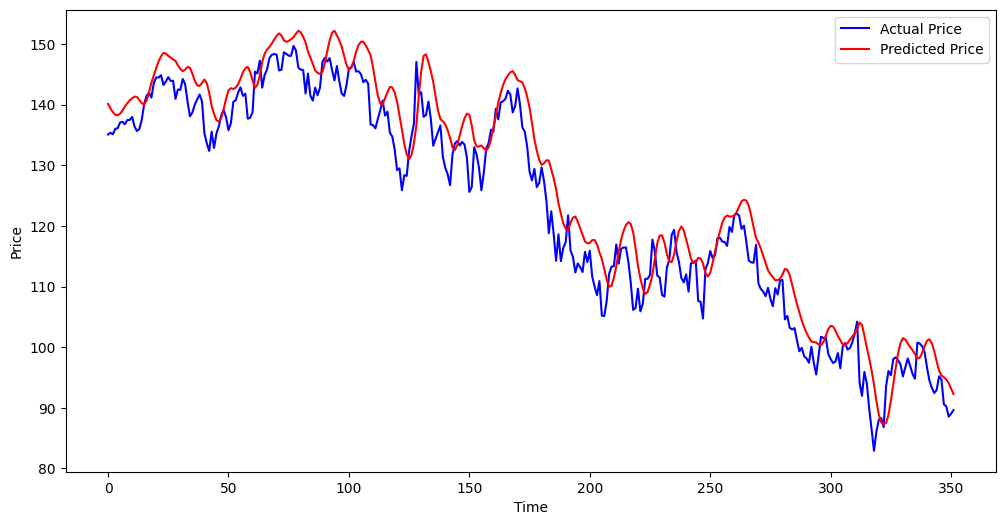

In [11]:
plt.figure(figsize=(12,6))
plt.plot(y_true, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [12]:
model.save('Stock_Prediction Model.keras')